Import library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

1a - Membuat dataframe

In [2]:
# 1a - Membuat dataframe dengan variabel yang ditentukan
# csv sudah memiliki header, langsung diload saja
df = pd.read_csv("insurance-cost.csv")
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


1b - Mengisi missing values, cari variabel mana yang kosong

In [3]:
# 1b - Mengisi missing values, cari variabel mana yang kosong
for i in df :
  print(i, " : ", df[i].isna().values.any())

age  :  False
sex  :  False
bmi  :  True
children  :  False
smoker  :  True
region  :  False
charges  :  False


Data yang memiliki NaN adalah bmi dan smoker, maka diisi dengan ketentuan yang diberikan

In [4]:
# bmi: continuous, null diisi mean sesuai jenis kelaminnya.
df['bmi'] = df['bmi'].fillna(df.groupby(['sex'])['bmi'].transform('mean'))

# print contoh missing values di variabel bmi
print(df.loc[[30]])
print("")
print(df.loc[[51]])

print("")

# smoker: categorical, null diisi modus sesuai jenis kelaminnya.
df['smoker'] = df['smoker'].fillna(df.groupby(['sex'])['smoker'].transform(lambda x: pd.Series.mode(x)[0]))

# print contoh missing values di variabel smoker
print(df.loc[[32]])
print("")
print(df.loc[[53]])

print("")

    age   sex       bmi  children smoker     region    charges
30   22  male  30.93623         0    yes  southwest  35585.576

    age     sex        bmi  children smoker     region    charges
51   21  female  30.372829         2     no  northwest  3579.8287

    age     sex   bmi  children smoker     region   charges
32   19  female  28.6         5     no  southwest  4687.797

    age   sex    bmi  children smoker     region     charges
53   36  male  34.43         0     no  southeast  37742.5757



Pembuktian bahwa tidak ada data yang kosong, menggunakan cara yang sama

In [5]:
#pembuktian sudah tidak ada nilai yang kosong
for i in df :
  print(i, " : ", df[i].isna().values.any())

age  :  False
sex  :  False
bmi  :  False
children  :  False
smoker  :  False
region  :  False
charges  :  False


1c - Membuat visualisasi terhadap setiap independent variabel.
Agar bisa divisualisasikan, maka kita harus mengubah variable categorical menjadi angka terlebih dahulu.

In [6]:
#1c buat visualisasi terhadap setiap independent variable 
newData = df[["age","sex","bmi","children","smoker","region", "charges"]]

#sex, smoker, dan region adalah variable categorical, maka diubah menjadi angka terlebih dahulu
newData["sex"] = newData["sex"].map({'female': 0, 'male': 1})
newData["smoker"] = newData["smoker"].map({'no': 0, 'yes': 1})
newData["region"] = newData["region"].map({'southwest': 0, 'southeast': 1, 'northwest':2, 'northeast':3})

#print new data
print(newData.head())
print("")

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       0  16884.92400
1   18    1  33.770         1       0       1   1725.55230
2   28    1  33.000         3       0       1   4449.46200
3   33    1  22.705         0       0       2  21984.47061
4   32    1  28.880         0       0       2   3866.85520



Print histogram untuk setiap variabel

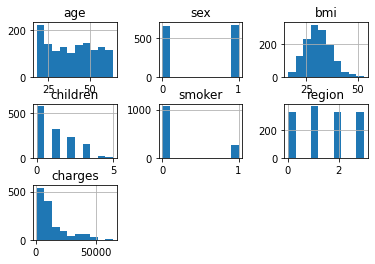

In [7]:
#print histogram
newData.hist()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Print scatter plot untuk relasi setiap independent variable, yaitu 15 kombinasi variabel.

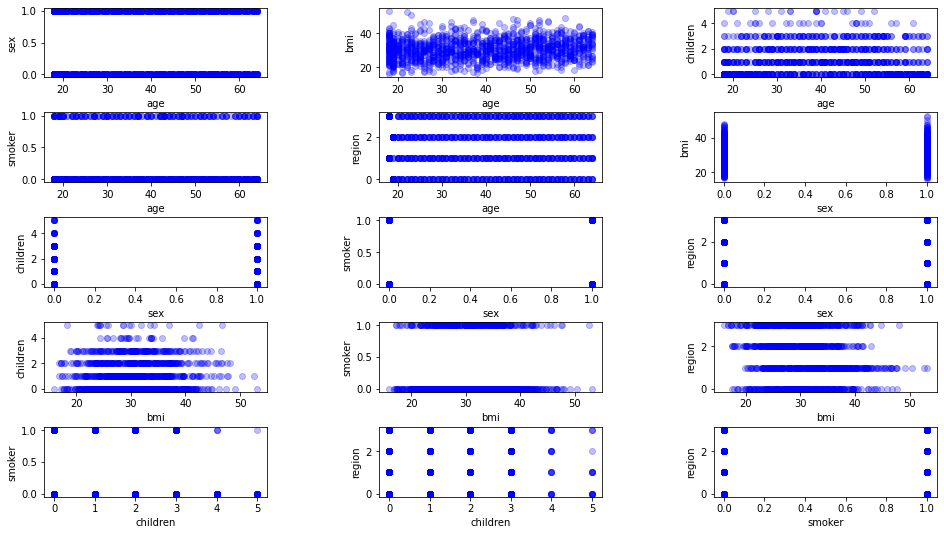

In [8]:
#print relasi terhadap setiap independent variable menggunakan scatter plot
#X adalah age
plt.subplot(531)
plt.scatter(newData["age"], newData["sex"], color="blue", alpha=0.25)
plt.xlabel("age")
plt.ylabel("sex")

plt.subplot(532)
plt.scatter(newData["age"], newData["bmi"], color="blue", alpha=0.25)
plt.xlabel("age")
plt.ylabel("bmi")

plt.subplot(533)
plt.scatter(newData["age"], newData["children"], color="blue", alpha=0.25)
plt.xlabel("age")
plt.ylabel("children")

plt.subplot(534)
plt.scatter(newData["age"], newData["smoker"], color="blue", alpha=0.25)
plt.xlabel("age")
plt.ylabel("smoker")

plt.subplot(535)
plt.scatter(newData["age"], newData["region"], color="blue", alpha=0.25)
plt.xlabel("age")
plt.ylabel("region")

#x adalah sex
plt.subplot(536)
plt.scatter(newData["sex"], newData["bmi"], color="blue", alpha=0.25)
plt.xlabel("sex")
plt.ylabel("bmi")

plt.subplot(537)
plt.scatter(newData["sex"], newData["children"], color="blue", alpha=0.25)
plt.xlabel("sex")
plt.ylabel("children")

plt.subplot(538)
plt.scatter(newData["sex"], newData["smoker"], color="blue", alpha=0.25)
plt.xlabel("sex")
plt.ylabel("smoker")

plt.subplot(539)
plt.scatter(newData["sex"], newData["region"], color="blue", alpha=0.25)
plt.xlabel("sex")
plt.ylabel("region")

#X adalah bmi
plt.subplot(5,3,10)
plt.scatter(newData["bmi"], newData["children"], color="blue", alpha=0.25)
plt.xlabel("bmi")
plt.ylabel("children")

plt.subplot(5,3,11)
plt.scatter(newData["bmi"], newData["smoker"], color="blue", alpha=0.25)
plt.xlabel("bmi")
plt.ylabel("smoker")

plt.subplot(5,3,12)
plt.scatter(newData["bmi"], newData["region"], color="blue", alpha=0.25)
plt.xlabel("bmi")
plt.ylabel("region")

#X adalah children
plt.subplot(5,3,13)
plt.scatter(newData["children"], newData["smoker"], color="blue", alpha=0.25)
plt.xlabel("children")
plt.ylabel("smoker")

plt.subplot(5,3,14)
plt.scatter(newData["children"], newData["region"], color="blue", alpha=0.25)
plt.xlabel("children")
plt.ylabel("region")

#X adalah smoker
plt.subplot(5,3,15)
plt.scatter(newData["smoker"], newData["region"], color="blue", alpha=0.25)
plt.xlabel("smoker")
plt.ylabel("region")

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

1d - Buat grafik korelasi setiap independen variable dengan dependent variable menggunakan scatter plot

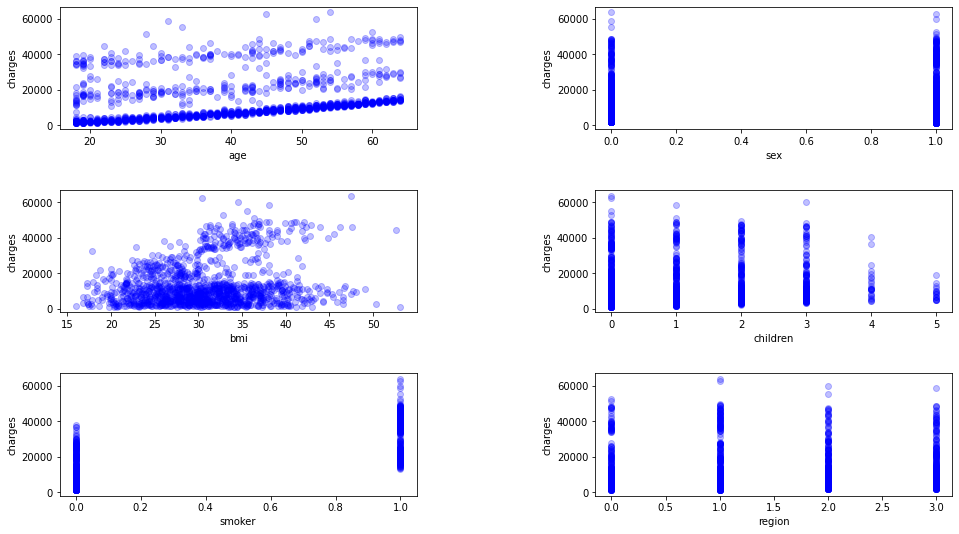

In [9]:
#1d Buat grafik correlation antara setiap independent variable dengan dependent variable
#scatter plot
plt.subplot(321)
plt.scatter(newData["age"], newData["charges"], color="blue", alpha=0.25)
plt.xlabel("age")
plt.ylabel("charges")

plt.subplot(322)
plt.scatter(newData["sex"], newData["charges"], color="blue", alpha=0.25)
plt.xlabel("sex")
plt.ylabel("charges")

plt.subplot(323)
plt.scatter(newData["bmi"], newData["charges"], color="blue", alpha=0.25)
plt.xlabel("bmi")
plt.ylabel("charges")

plt.subplot(324)
plt.scatter(newData["children"], newData["charges"], color="blue", alpha=0.25)
plt.xlabel("children")
plt.ylabel("charges")

plt.subplot(325)
plt.scatter(newData["smoker"], newData["charges"], color="blue", alpha=0.25)
plt.xlabel("smoker")
plt.ylabel("charges")

plt.subplot(326)
plt.scatter(newData["region"], newData["charges"], color="blue", alpha=0.25)
plt.xlabel("region")
plt.ylabel("charges")

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Print correlation matrix

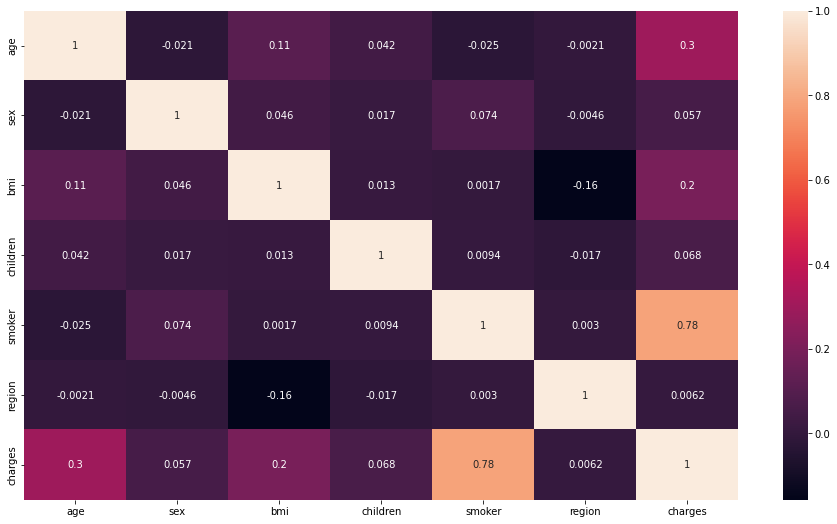

In [10]:
#correlation matrixnya
corr_matrix = newData.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()

2 - Membuat Training set dan Test set

In [11]:
#2 Buatlah Training Set dan Test Set dengan proporsi 4:1
X = newData[["age", "bmi", "children", "smoker"]]
Y = newData["charges"]
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.2)

#print hasil training set yang sudah dipilih secara random
jointTrainData = pd.concat([XTrain, YTrain], axis=1)

pd.set_option('display.max_rows', None)  
print(jointTrainData)
pd.reset_option('display.max_rows')

print("Total Train Data: ", len(jointTrainData))
print("")

      age        bmi  children  smoker       charges
451    30  24.130000         1       0   4032.240700
671    29  31.160000         0       0   3943.595400
310    50  26.600000         0       0   8444.474000
1236   63  21.660000         0       0  14449.854400
1175   22  27.100000         0       0   2154.361000
152    32  37.145000         3       0   6334.343550
1234   45  27.830000         2       0   8515.758700
581    19  30.590000         0       0   1639.563100
788    29  22.515000         3       0   5209.578850
43     37  30.800000         2       0   6313.759000
595    46  33.725000         1       0   8823.985750
1031   55  35.200000         0       1  44423.803000
235    40  22.220000         2       1  19444.265800
598    43  32.600000         2       0   7441.501000
463    56  25.935000         0       0  11165.417650
619    55  37.100000         0       0  10713.644000
1193   48  36.575000         0       0   8671.191250
840    21  31.100000         0       0   1526.

3a - Melakukan prediksi dengan menggunakan test set

In [12]:
#3a Lakukan prediksi menggunakan test set
regression = LinearRegression().fit(XTrain, YTrain)

YPredict = regression.predict(XTest)

3b - Tampilkan hasil prediksi dan nilai sebenarnya

In [13]:
#3b Tampilkan hasil prediksi tersebut dan nilai sebenarnya dari test set
for i in range(len(XTest)):
  print("Predicted : %-15.5lf" % (YPredict[i]), " Actual : %-15.5lf" % (YTest.values[i]))

print("Total Test Set: ", len(XTest))
print("")

Predicted : 13869.58615      Actual : 12925.88600    
Predicted : 3329.23294       Actual : 5116.50040     
Predicted : 14308.76244      Actual : 11362.75500    
Predicted : 10799.94064      Actual : 12957.11800    
Predicted : 9947.97436       Actual : 8027.96800     
Predicted : 28101.38368      Actual : 34472.84100    
Predicted : 13804.91504      Actual : 11552.90400    
Predicted : 15430.30618      Actual : 28287.89766    
Predicted : 12042.54085      Actual : 8124.40840     
Predicted : 30679.90517      Actual : 39722.74620    
Predicted : 10671.60270      Actual : 6196.44800     
Predicted : 4546.12710       Actual : 2136.88225     
Predicted : 6950.31520       Actual : 5152.13400     
Predicted : 7956.33844       Actual : 5594.84550     
Predicted : 4145.09362       Actual : 2866.09100     
Predicted : 11425.35214      Actual : 9620.33070     
Predicted : 6343.92841       Actual : 6652.52880     
Predicted : 7580.99354       Actual : 4504.66240     
Predicted : 29218.20494     

4a - Tampilkan persamaan regresi

In [14]:
#4a Tampilkan persamaan regresi
print("Intercept (Konstanta)    : ", regression.intercept_)
print("Kofisien  (age, bmi, children, smoker) : ", regression.coef_)
print("Persamaan  Regresi: ", \
  regression.intercept_ , "+", \
  regression.coef_[0], "x1 + ", \
  regression.coef_[1], "x2 + ", \
  regression.coef_[2], "x3 + ", \
  regression.coef_[3], "x4"
)
print("")

Intercept (Konstanta)    :  -11953.668786404673
Kofisien  (age, bmi, children, smoker) :  [  257.44479328   317.38468404   603.84350671 23497.89825999]
Persamaan  Regresi:  -11953.668786404673 + 257.4447932789643 x1 +  317.38468403661375 x2 +  603.8435067133885 x3 +  23497.89825998943 x4



4c - Evaluasi dari hasil nilai prediksi

In [15]:
#4c Evaluasi dari hasil nilai prediksi
print("Mean Absolute Error (MAE) : ", mean_absolute_error(YTest, YPredict))
print("Mean Squared Error (MSE) : ", mean_squared_error(YTest, YPredict))
print("Root Mean Squared Error (RMSE) : ",  mean_squared_error(YTest, YPredict, squared=False))
print("R2 Score   : ", r2_score(YTest, YPredict))
print("")

Mean Absolute Error (MAE) :  3458.7575977713627
Mean Squared Error (MSE) :  24733123.55145035
Root Mean Squared Error (RMSE) :  4973.240749395744
R2 Score   :  0.8007951741169967



5 - Plot menggambarkan hasil dari predicted value dan actual value

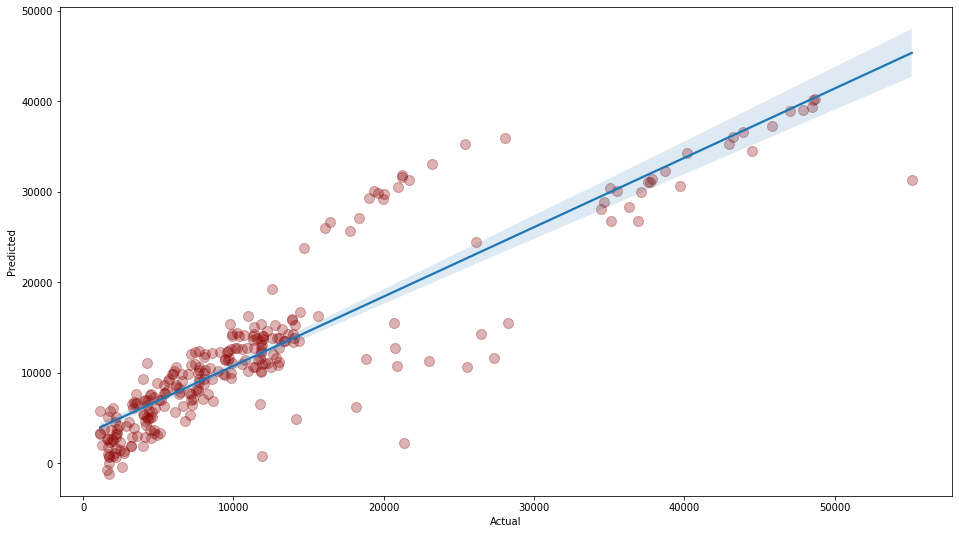

In [16]:
#5 plot yang menggambarkan hasil dari predicted value dan actual value
plotNewData = pd.DataFrame({"Actual": YTest, "Predicted": YPredict})
sb.regplot(x='Actual',y='Predicted', data=plotNewData, fit_reg=True, scatter_kws={'color': 'darkred', 'alpha': 0.3, 's': 100})

plt.show()